# The Android App Market on Google Play

## 1. Google Play Store apps and reviews

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

![](img/mika-baumeister-QIpLrHJiv2o-unsplash.jpg)

Let's take a look at the data downloaded from [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps), which consists of two files:
- googleplaystore.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
- googleplaystore_user_reviews.csv: contains 100 reviews for each app, [most helpful first](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/). The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.


In [1]:
# Install requirements
# !python -m pip install -r requirements.txt

# Import packages
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
import warnings

sns.set_style("darkgrid")
plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read in dataset
apps = pd.read_csv("datasets/googleplaystore.csv")

In [3]:
# Print the total number of apps
print(f"Total number of apps in the dataset = {apps.shape[0]}")

Total number of apps in the dataset = 10841


In [4]:
# Print the first 5 rows
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Load user_reviews.csv
reviews_df = pd.read_csv("datasets/googleplaystore_user_reviews.csv")

In [6]:
# Print the first 5 rows
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## 2. Data cleaning

Data cleaning is one of the most essential subtask in any data science project. Although it can be a very tedious process, its worth should never be undermined.

In [7]:
# Get summary of missing values
apps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

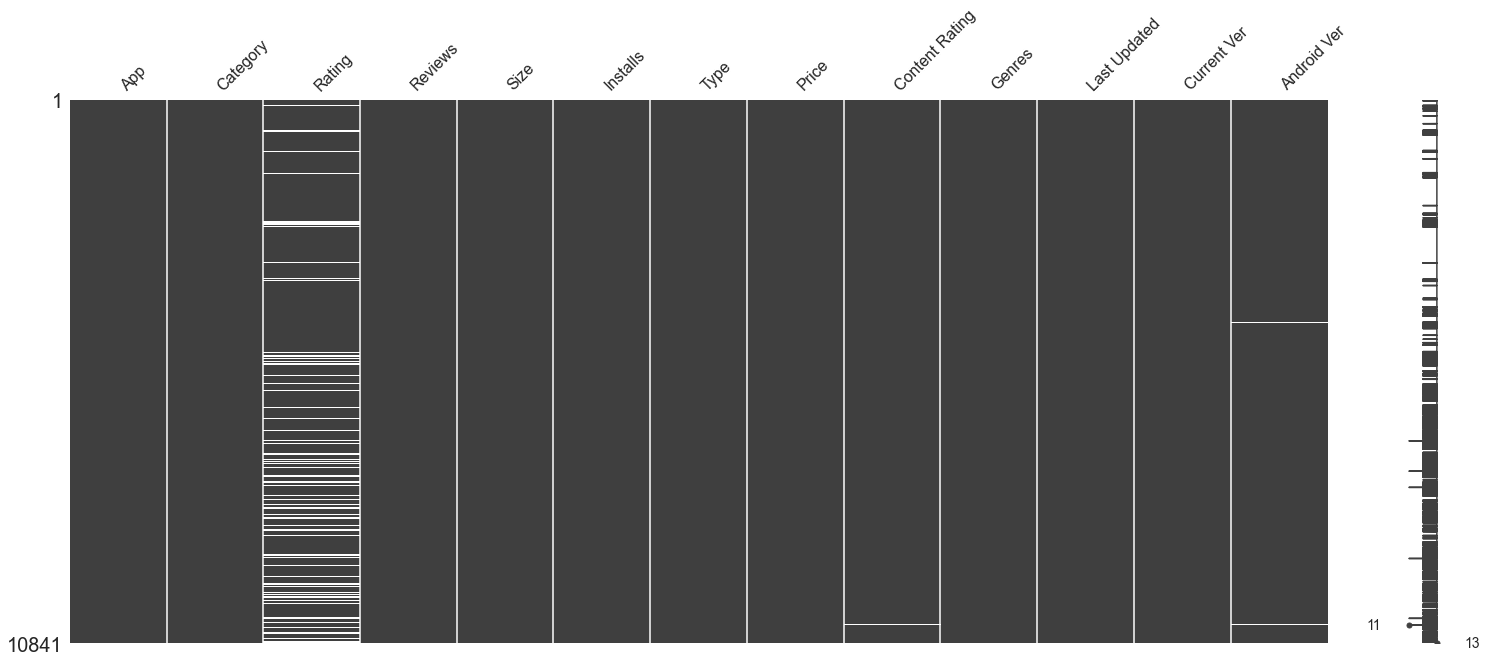

In [8]:
# Visualize missing values in apps DataFrame
msno.matrix(apps);

In [9]:
# Sort apps DataFrame by `Reviews` column to characterize the missingness type in the data
sorted_apps = apps.sort_values(by="Reviews")

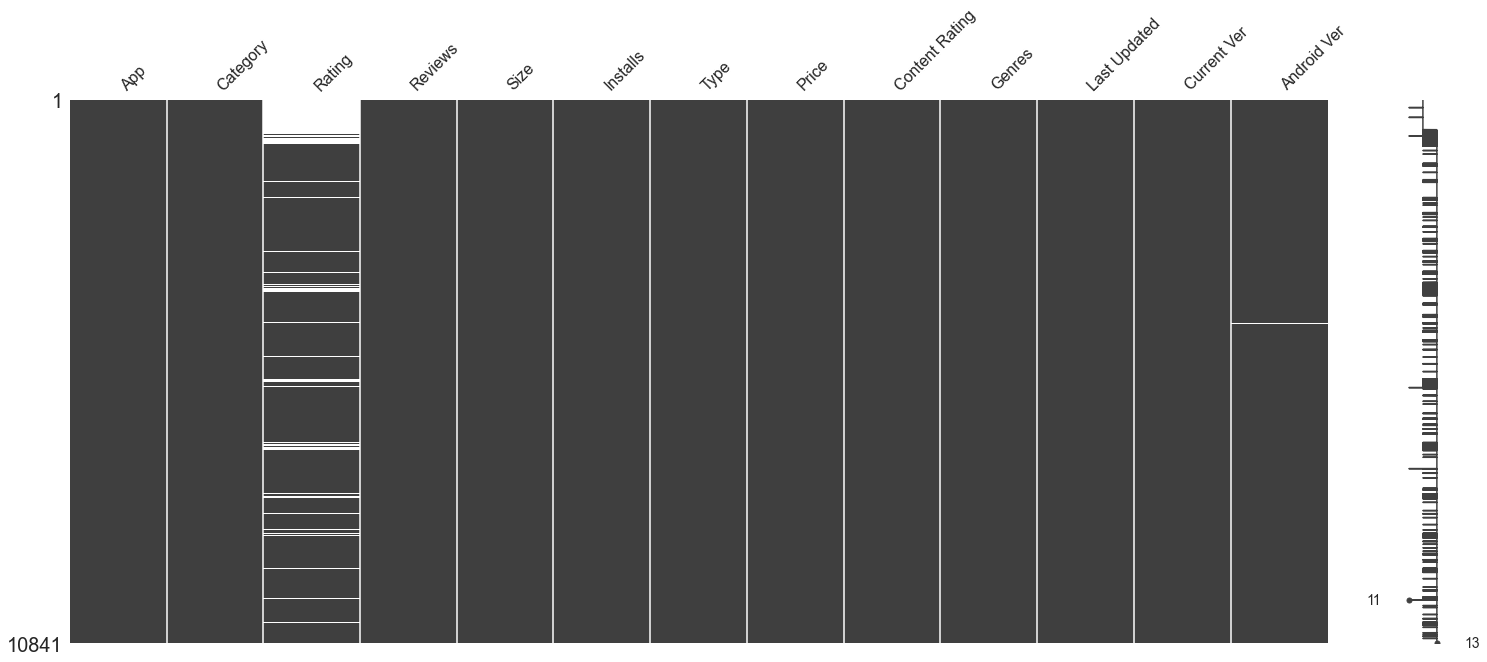

In [10]:
# Visualize missing data in sorted_apps DataFrame
msno.matrix(sorted_apps);

**Observation:**
- It seems like the apps with the lowest number of reviews seems to be the most missing rating values; however, there are still other rating values that are missing at random in the rest of the dataframe.
- The missingness in the data can be classified as *Missing Completely at Random* with a strong probability that it can also be *Missing at Random*.

In [11]:
# Drop all missing values from the apps DataFrame
apps.dropna(inplace=True)

In [12]:
# Verify that there are no missing values in the apps DataFrame
assert apps.isna().sum().sum() == 0

In [13]:
# Get duplicate rows
duplicates = apps.duplicated()

In [14]:
# Output duplicate values
apps[duplicates].sort_values(by="App")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11M,100+,Free,0,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3085,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


In [15]:
# Drop Duplicates
apps.drop_duplicates(inplace=True)

In [16]:
# Verify that there are no duplicates in the apps DataFrame
assert apps.duplicated().sum() == 0

**Observation**:
- By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like `Size`, `Installs` and `Price` have a few special characters (`M`, `+`, `,`, `$`) due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].
- Hence, we now proceed to clean our data. Specifically, the characters `M` present in `Size` column, `,` and `+` present in `Installs` column and `$` present in `Price` column need to be removed.
- Also, we can see that some of the row in the `Size` column for instance contain text like *Varies with device* which is not numerical, these rows will be dropped too.
- It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the `info()` method to acheive this.

In [17]:
# List of column names to clean
cols_to_clean = ["Size", "Installs", "Price"]

In [18]:
# Replace letter and special characters with nothing
for col in cols_to_clean:
    apps[col] = apps[col].str.replace(r"\D+", "")

In [19]:
# Verify if any of the columns contain any special character
assert apps["Size"].str.contains("M").any() == False

In [20]:
# Select rows in `Size` column that contain comment instead of numeric values
comment_rows = apps["Size"] == ""

In [21]:
# Keep only valid rows in apps DataFrame
apps = apps[~comment_rows]

In [22]:
# Print a summary of the apps DataFrame
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7418 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7418 non-null   object 
 1   Category        7418 non-null   object 
 2   Rating          7418 non-null   float64
 3   Reviews         7418 non-null   object 
 4   Size            7418 non-null   object 
 5   Installs        7418 non-null   object 
 6   Type            7418 non-null   object 
 7   Price           7418 non-null   object 
 8   Content Rating  7418 non-null   object 
 9   Genres          7418 non-null   object 
 10  Last Updated    7418 non-null   object 
 11  Current Ver     7418 non-null   object 
 12  Android Ver     7418 non-null   object 
dtypes: float64(1), object(12)
memory usage: 811.3+ KB


## 3. Correcting data types

From the previous task we noticed that `Size`, `Installs` and `Price` were categorized as object data type (and not int or float) as we would like. This is because two of these three columns originally had mixed input types: digits and special characters. To know more about Pandas data types, read [this](https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/).

The four features that we will be working with most frequently henceforth are `Installs`, `Size`, `Rating` and `Price`. While Rating is float (i.e. purely numerical data types), we still need to work on `Size`, `Installs` and `Price` to make them numeric.

In [23]:
# Convert columns to float data type
apps[["Size", "Installs", "Price"]] = apps[["Size", "Installs", "Price"]].astype(np.float)

In [24]:
# Verify if all the needed columns are in float type
assert apps.dtypes[apps.dtypes == "float64"].count() == 4

## 4. Exploring app categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:
- Which category has the highest share of (active) apps in the market?
- Is any specific category dominating the market?
- Which categories have the fewest number of apps?

In [25]:
# Print the total number of unique categories
num_categories = len(apps["Category"].unique())
print(f"Number of categories = {num_categories}")

Number of categories = 33


In [26]:
# Count the number of apps in each 'Category'. 
num_apps_in_category = apps["Category"].value_counts()

In [27]:
# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

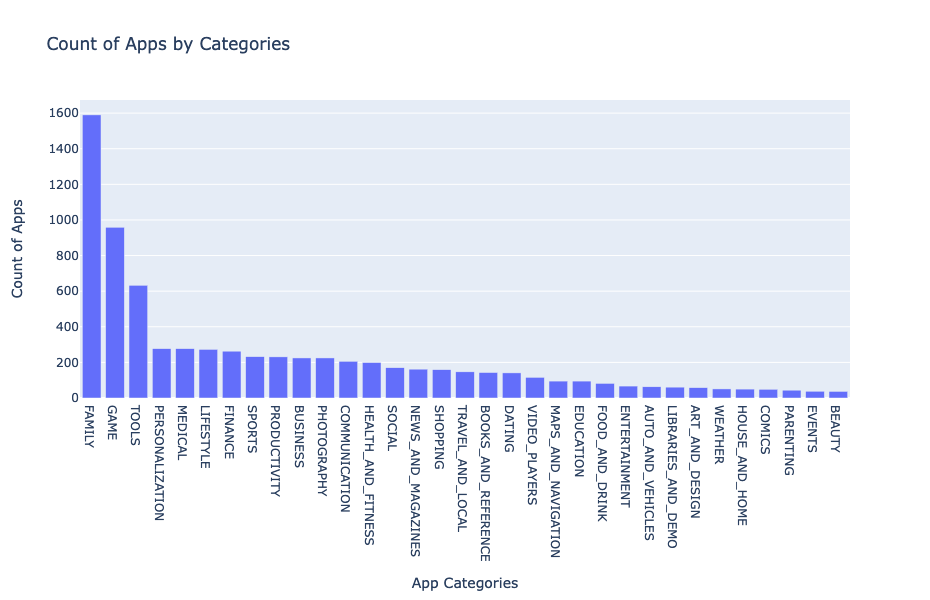

In [28]:
# Plot the different categories of apps
fig = px.bar(sorted_num_apps_in_category, x=num_apps_in_category.index, y=num_apps_in_category.values,
             labels={"x":"App Categories", "y":"Count of Apps"}, title="Count of Apps by Categories", height=600)

fig.show()

**Observation**:
- We see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

## 5. Distribution of app ratings

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

In [29]:
# Average rating of apps
avg_app_rating = apps["Rating"].mean()
print(f"Average app rating = {avg_app_rating:.2f}")

Average app rating = 4.17


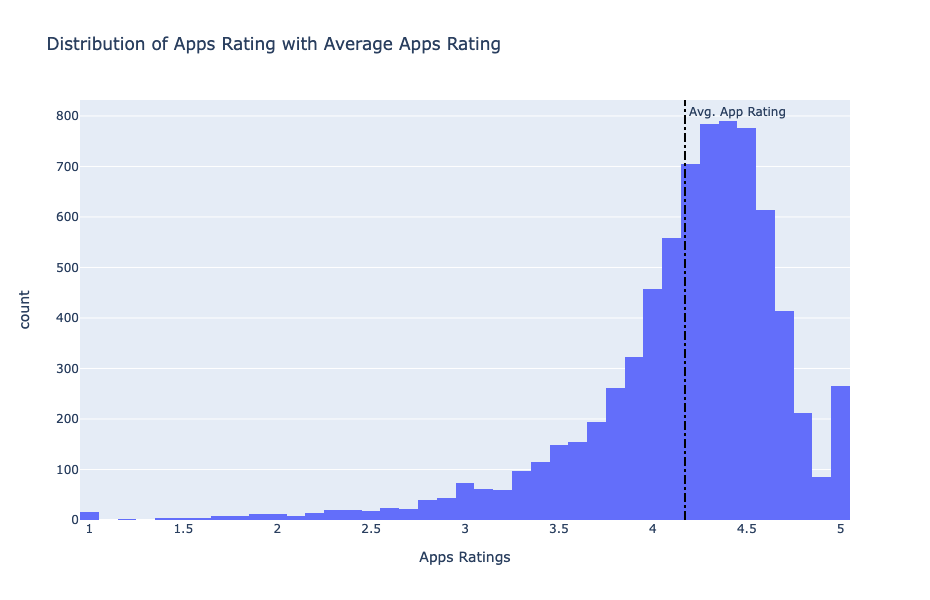

In [30]:
# Plot distribution of apps according to their ratings
fig = px.histogram(apps, x="Rating", labels={"Rating": "Apps Ratings"}, title="Distribution of Apps Rating with Average Apps Rating", height=600)

# Plot vertical dashed line to indicate the average app rating
fig.add_vline(x=avg_app_rating, line_dash="dashdot", line_color="black", annotation_text="Avg. App Rating")

fig.show()

**Observation**:
- From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

## 6. Size and price of an app

Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?
- Does the size of an app affect its rating?
- Do users really care about system-heavy apps or do they prefer light-weighted apps?
- Does the price of an app affect its rating?
- Do users always prefer free apps over paid apps?

In [31]:
# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(apps["Rating"].notnull()) & (apps["Size"].notnull())]

In [32]:
# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

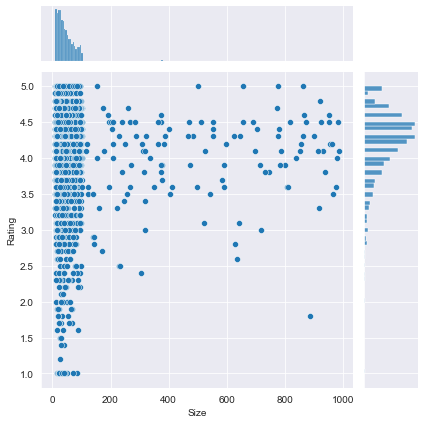

In [33]:
# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])

In [34]:
# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

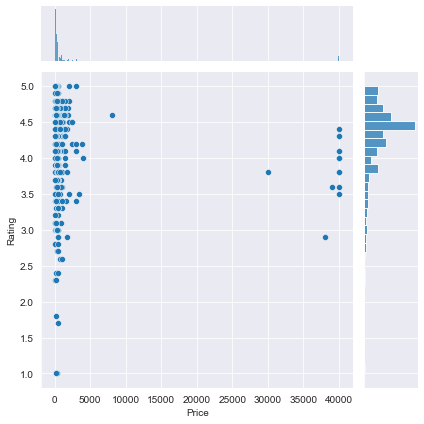

In [35]:
# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

**Observation**:
- We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.

## 7. Relation between app category and app price

So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients.

In [36]:
# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

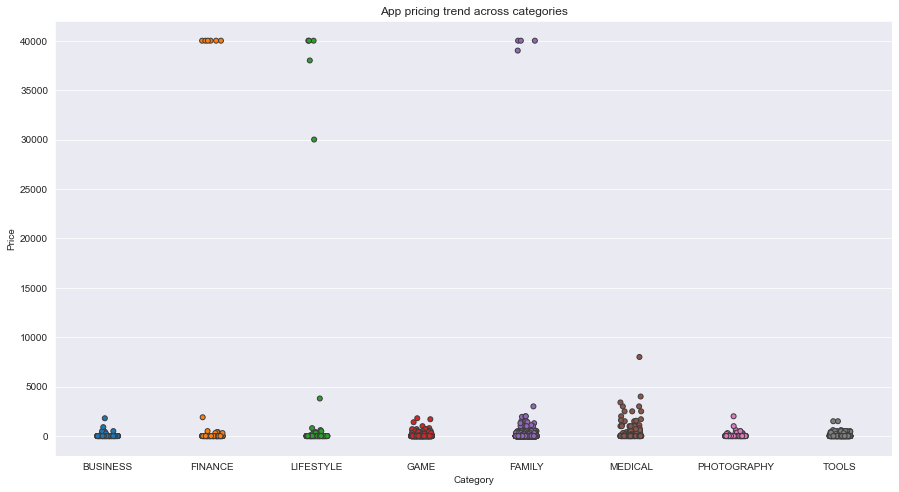

In [37]:
# Examine the price trend by plotting Price vs Category
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x = popular_app_cats["Category"], y = popular_app_cats["Price"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories');

In [38]:
# Apps whose Price is greater than 200
apps_above_200 = apps[apps["Price"] > 200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
234,BUSINESS,TurboScan: scan documents and receipts in PDF,499.0
235,BUSINESS,Tiny Scanner Pro: PDF Doc Scan,499.0
477,DATING,Calculator,699.0
481,DATING,AMBW Dating App: Asian Men Black Women Interra...,799.0
851,EDUCATION,Sago Mini Hat Maker,399.0
...,...,...,...
10531,TOOLS,Kernel Manager for Franco Kernel ✨,349.0
10540,FINANCE,Ray Financial Calculator Pro,299.0
10583,WEATHER,Florida Tides & Weather,699.0
10760,HEALTH_AND_FITNESS,Fast Tract Diet,799.0


**Observation**:
- We see that Medical and Family apps are the most expensive. Some medical apps extend even up to \\$80! All game apps are reasonably priced below \\$20.

## 8. Filter out "junk" apps

It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called *I Am Rich Premium* or *most expensive app (H)* just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization.

In [39]:
# Select apps priced below $5000
apps_under_5000 = popular_app_cats[popular_app_cats["Price"] < 5000]

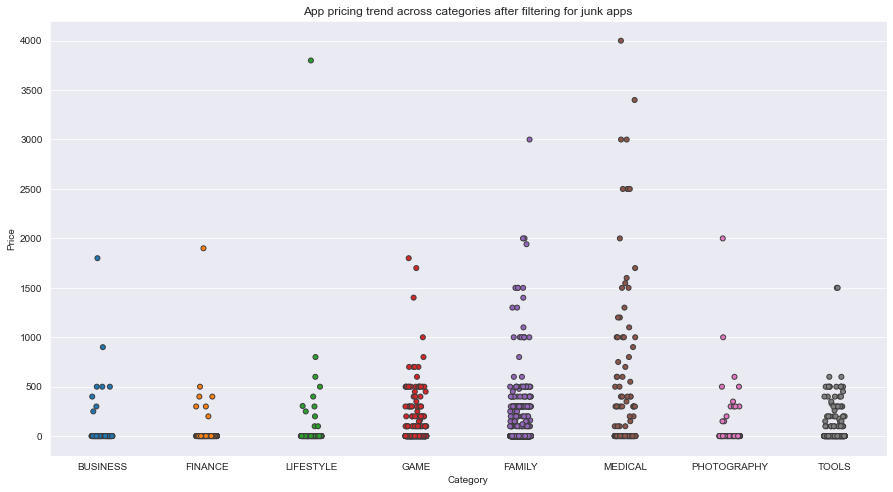

In [40]:
# Examine price vs category with the authentic apps (apps_under_5000)
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.stripplot(x = "Category", y = "Price", 
                   data = apps_under_5000, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps');

## 9. Popularity of paid apps vs free apps

For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:
- Free to download.
- Main source of income often comes from advertisements.
- Often created by companies that have other products and the app serves as an extension of those products.
- Can serve as a tool for customer retention, communication, and customer service.

Some characteristics of paid apps are:
- Users are asked to pay once for the app to download and use it.
- The user can't really get a feel for the app before buying it.

Are paid apps installed as much as free apps?

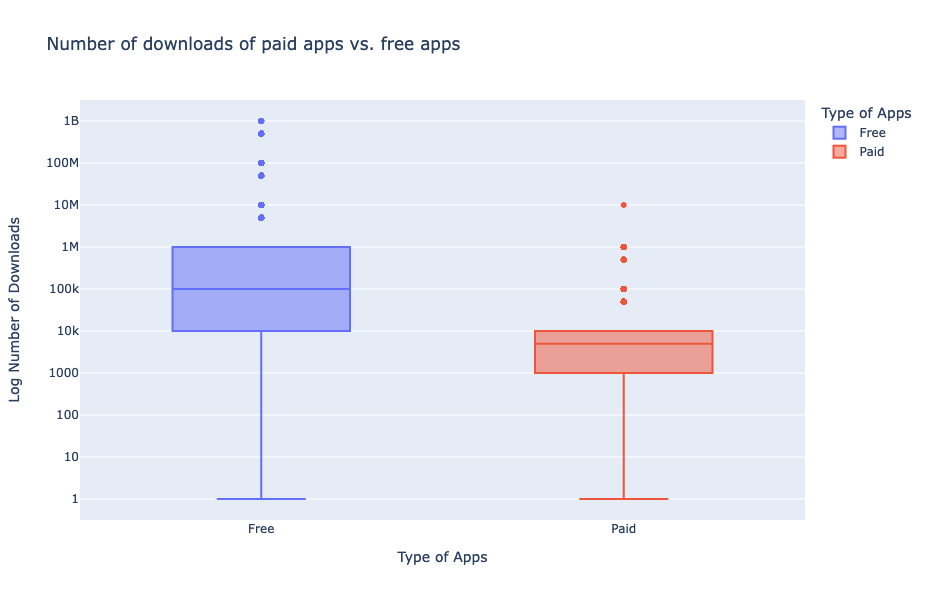

In [41]:
# Plot characteristics of installed free and paid apps on a box plot to compare
fig = px.box(apps, x="Type", y="Installs", color="Type", log_y=True,
             labels={"Type":"Type of Apps", "Installs":"Log Number of Downloads"}, title = "Number of downloads of paid apps vs. free apps", height=600)
fig.show()

**Observation**:
- It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

## 10. Sentiment analysis of user reviews

Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

In [42]:
# Join the apps and reviews_df DataFrames
merged_df = apps.merge(reviews_df, on="App")

In [43]:
# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

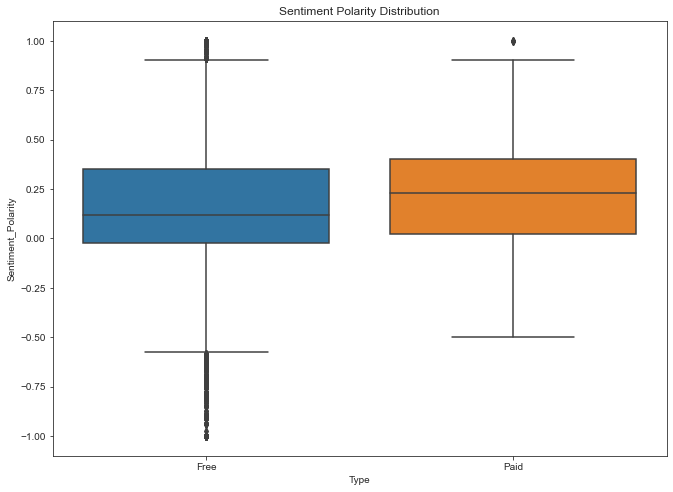

In [44]:
# User review sentiment polarity for paid vs. free apps
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title('Sentiment Polarity Distribution');

**Observation**:
- By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

## 11. Conclusion

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.